In [4]:
import numpy as np
from random import randint

import cv2

from matplotlib import pyplot as plt

In [3]:
class Perceptron:
    def __init__ (self, eta, n_iter, random_state):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state
    
    def fit(self, X, y):
        rgen = np.random.RandomState(self.random_state)
        self.w = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1] )
        
        for _ in range(self.n_iter):
            
            for xi, target in zip(X, y):
                update = self.eta * ( target - self.predict(xi) )
                self.w[1:] += update * xi
                self.w[0] += update 
        
    def net_input(self, X):
        return np.dot(X, self.w[1:]) + self.w[0]
    
    def predict(self, X):
        return np.where(self.net_input(X) >= 0.0, 1, -1 )

In [59]:

ppn = Perceptron(0.01, 50, 1)

In [60]:
X = np.array( [[1,2],[2, 2]] )
y = np.array( [1,-1] )
ppn.fit( X , y)

In [61]:
ppn.predict( np.array( [[1,2],[2, 2]] ) )

array([ 1, -1])

In [183]:
ppn2 = Perceptron(0.01,100, 1)

In [184]:
rgen = np.random.RandomState(2)
#X1 = rgen.randint(low=5, high=10, size=(12,2) )
#X2 = rgen.randint(low=0, high=5, size=(14,2) )
X = rgen.randint(low=0, high=10, size=(20,2))
#X
y = np.where( 10- X.T[0] > X.T[1], 1, -1)

x1_gr = X[y==-1]

x2_gr = X[y==1]  



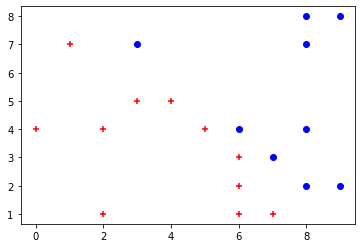

In [185]:
plt.scatter(x1_gr[:,0], x1_gr[:,1], color='blue', marker='o')

plt.scatter(x2_gr[:,0], x2_gr[:,1], color='red', marker='+')

In [186]:
ppn2.fit(X, y)

In [187]:
ppn2.predict([2,6])


array(1)

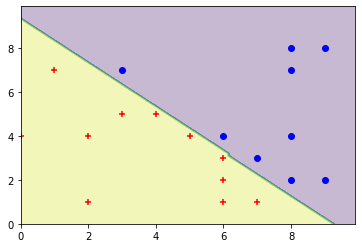

In [188]:
gap1 = np.arange( 0, 10, 0.1)
gap2 = np.arange( 0, 10, 0.1)

xx1, xx2 = np.meshgrid(gap1, gap2 )

in_arr = np.array(  [xx1.ravel(), xx2.ravel()]).T
y_ = ppn2.predict( in_arr )
y_ = y_.reshape(xx1.shape)
plt.contourf( xx1, xx2, y_, alpha=0.3 )

plt.scatter(x1_gr[:,0], x1_gr[:,1], color='blue', marker='o')

plt.scatter(x2_gr[:,0], x2_gr[:,1], color='red', marker='+')

In [138]:
y_

array([ 1,  1,  1, ..., -1, -1, -1])

## Получение фото нашего цвета

In [28]:
import cv2

In [14]:
cap = cv2.VideoCapture(0)

In [18]:
tr, img = cap.read()
cv2.imshow('', img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [19]:
cap.release()

In [22]:
img_hsv = cv2.cvtColor( img, cv2.COLOR_BGR2HSV )

In [26]:
low = (0, 150, 150)
high = (15, 255, 255)

img_y = cv2.inRange(img_hsv, low, high)

In [29]:
cv2.imshow('', img)
cv2.imshow('mask', img_y)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [46]:
#X = np.ravel(img[:,:,0])
#X

array([100,  95,  92, ...,  57,  54,  54], dtype=uint8)

In [42]:
y = np.ravel(img_y)
y = np.where(y>0, 1, -1 )
y

array([-1, -1, -1, ..., -1, -1, -1])

In [55]:
X_in = np.zeros((y.shape[0], 3)).T 
X_in[0] = np.ravel(img[:,:,0])
X_in[1] = np.ravel(img[:,:,1])
X_in[2] = np.ravel(img[:,:,2])
X_in = X_in.T
X_in

array([[100., 124., 133.],
       [ 95., 120., 129.],
       [ 92., 121., 130.],
       ...,
       [ 57.,  79.,  65.],
       [ 54.,  78.,  61.],
       [ 54.,  79.,  59.]])

In [56]:
ppn = Perceptron(0.1, 50, 1)

In [57]:
ppn.fit(X_in, y)

In [58]:
y_ = ppn.predict(img)

In [68]:
y_ = np.reshape(y_,  (img.shape[0], img.shape[1]) )
y_ = np.uint8(y_)
cv2.imshow('', y_)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [69]:
def prediction(img):
    y_ = ppn.predict(img)
    y_ = np.reshape(y_,  (img.shape[0], img.shape[1]) )
    y_ = np.uint8(y_)
    return y_

In [72]:
cap = cv2.VideoCapture(0)

while True:
    tr, frame = cap.read()
    
    ###
    frame_hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
    low = (0, 150, 150)
    high = (15, 255, 255)

    img_mask = cv2.inRange(frame_hsv , low, high)
    ###
    cv2.imshow('frame', frame)
    cv2.imshow('perceptron', prediction(frame) )
    cv2.imshow('mask', img_mask) # не обязательно
    key = cv2.waitKey(1)
    
    if key == 27:
        break
cv2.destroyAllWindows()

In [74]:
ppn.w

array([-714.58375655, -109.20611756,  -53.20528172,   38.58927031])